In [52]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix, precision_recall_fscore_support, plot_precision_recall_curve, accuracy_score

In [2]:
user_engagement = pd.read_csv('takehome_user_engagement.csv', parse_dates=['time_stamp'])

In [3]:
user_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [4]:
user_engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [23]:
users = pd.read_csv('takehome_users.csv', encoding='iso-8859-1', parse_dates=['last_session_creation_time', 'creation_time'])

In [24]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1398138810,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1396237504,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1363734892,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1369210168,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1358849660,0,0,193,5240.0


In [25]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   object        
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 937.6+ KB


In [26]:
users = users.drop(columns=['last_session_creation_time','invited_by_user_id'])

In [27]:
active = []
for uid in user_engagement.user_id.unique():
    login_days = user_engagement[user_engagement.user_id == uid].time_stamp.dt.date.unique()
    if len(login_days) >= 3:
        for i in range(2,len(login_days)):
            if (login_days[i] - login_days[i-2]) <= np.timedelta64(7, 'D'):
                active.append(uid)
                break

In [28]:
active

[2,
 10,
 20,
 33,
 42,
 43,
 50,
 53,
 60,
 63,
 69,
 74,
 80,
 81,
 82,
 87,
 133,
 135,
 141,
 146,
 153,
 160,
 165,
 168,
 172,
 174,
 185,
 188,
 197,
 200,
 202,
 203,
 209,
 214,
 230,
 245,
 247,
 263,
 265,
 275,
 280,
 283,
 297,
 298,
 305,
 310,
 311,
 321,
 322,
 341,
 345,
 347,
 351,
 362,
 363,
 370,
 383,
 397,
 401,
 418,
 430,
 445,
 450,
 460,
 462,
 469,
 471,
 472,
 478,
 479,
 483,
 492,
 494,
 497,
 502,
 506,
 509,
 510,
 512,
 518,
 520,
 522,
 529,
 535,
 540,
 547,
 553,
 564,
 572,
 589,
 591,
 601,
 603,
 605,
 618,
 627,
 628,
 632,
 634,
 639,
 669,
 679,
 680,
 717,
 724,
 725,
 728,
 754,
 772,
 783,
 786,
 804,
 828,
 845,
 851,
 869,
 874,
 882,
 885,
 901,
 906,
 907,
 912,
 928,
 932,
 934,
 937,
 943,
 953,
 980,
 985,
 1007,
 1009,
 1013,
 1017,
 1018,
 1026,
 1027,
 1035,
 1039,
 1055,
 1061,
 1072,
 1089,
 1093,
 1094,
 1099,
 1106,
 1107,
 1119,
 1123,
 1124,
 1128,
 1129,
 1136,
 1145,
 1150,
 1151,
 1155,
 1156,
 1163,
 1173,
 1186,
 1196,


In [29]:
users['active'] = users['object_id'].apply(lambda x: x in active)

In [30]:
def matching_creating_login_times(obj_id):
    logins = list(user_engagement[user_engagement.user_id == obj_id].time_stamp.sort_values())
    if len(logins) > 0:
        res = (logins[0] == users[users.object_id == obj_id].creation_time).iloc[0]
    else:
        res = False
        
    return res

In [31]:
users['immediate_login'] = users['object_id'].apply(lambda x: matching_creating_login_times(x))

In [32]:
users.head()

,object_id,creation_time,name,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,active,immediate_login
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1,0,11,False,True
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,1,True,True
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,0,0,94,False,True
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,0,0,1,False,False
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,0,0,193,False,False


In [33]:
users.drop(columns=['name','email','object_id'],inplace=True)
users.head()

,creation_time,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,active,immediate_login
0,2014-04-22 03:53:30,GUEST_INVITE,1,0,11,False,True
1,2013-11-15 03:45:04,ORG_INVITE,0,0,1,True,True
2,2013-03-19 23:14:52,ORG_INVITE,0,0,94,False,True
3,2013-05-21 08:09:28,GUEST_INVITE,0,0,1,False,False
4,2013-01-17 10:14:20,GUEST_INVITE,0,0,193,False,False


In [34]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   creation_time               12000 non-null  datetime64[ns]
 1   creation_source             12000 non-null  object        
 2   opted_in_to_mailing_list    12000 non-null  int64         
 3   enabled_for_marketing_drip  12000 non-null  int64         
 4   org_id                      12000 non-null  int64         
 5   active                      12000 non-null  bool          
 6   immediate_login             12000 non-null  bool          
dtypes: bool(2), datetime64[ns](1), int64(3), object(1)
memory usage: 492.3+ KB


<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


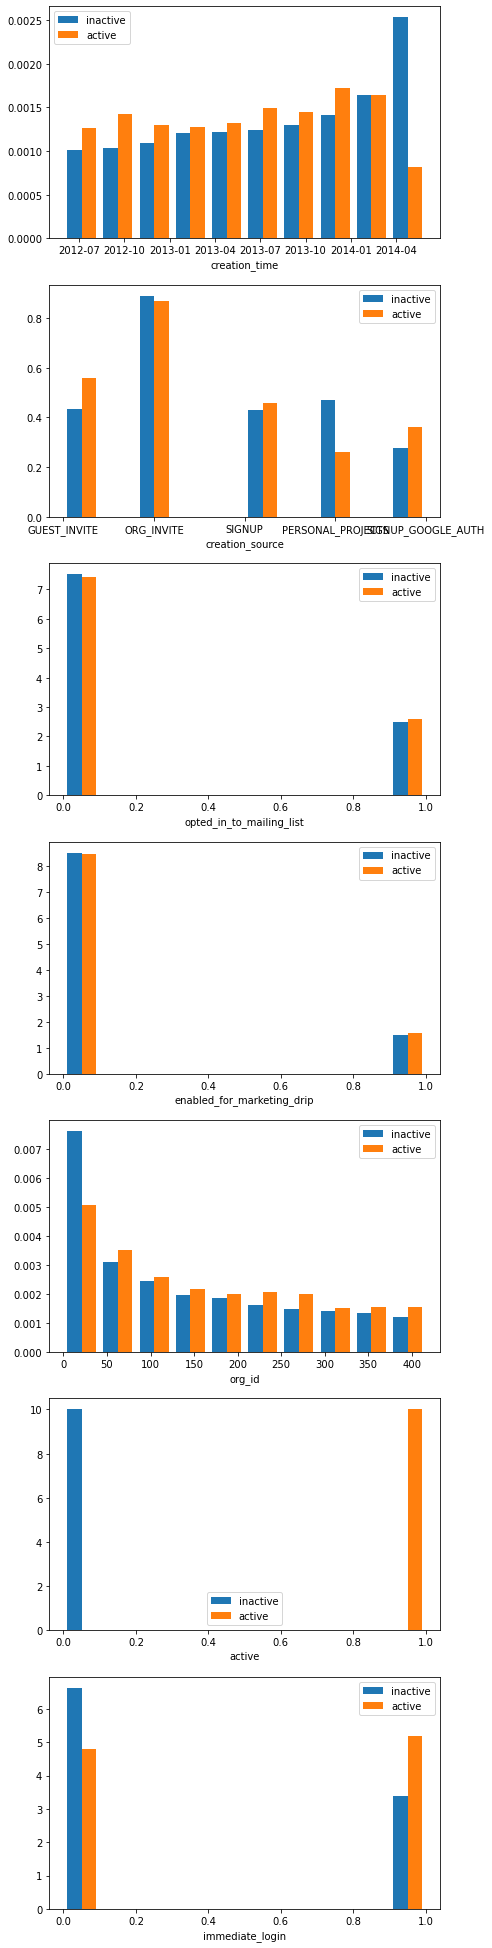

In [35]:
inactive = users[users.active==False]
active = users[users.active==True]

cols = users.columns
fig, axes = plt.subplots(len(cols), figsize=(7, 5*len(cols)))
for ax, col in zip(axes, cols): 
    ax.hist([inactive[col], active[col]], label=['inactive', 'active'], density=True)
    ax.legend()
    ax.set_xlabel(col)
plt.show()

In [36]:
data = pd.get_dummies(users)
data = data.drop(columns=['creation_time'])

In [37]:
data.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,active,immediate_login,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,0,11,False,True,1,0,0,0,0
1,0,0,1,True,True,0,1,0,0,0
2,0,0,94,False,True,0,1,0,0,0
3,0,0,1,False,False,1,0,0,0,0
4,0,0,193,False,False,1,0,0,0,0


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   opted_in_to_mailing_list            12000 non-null  int64
 1   enabled_for_marketing_drip          12000 non-null  int64
 2   org_id                              12000 non-null  int64
 3   active                              12000 non-null  bool 
 4   immediate_login                     12000 non-null  bool 
 5   creation_source_GUEST_INVITE        12000 non-null  uint8
 6   creation_source_ORG_INVITE          12000 non-null  uint8
 7   creation_source_PERSONAL_PROJECTS   12000 non-null  uint8
 8   creation_source_SIGNUP              12000 non-null  uint8
 9   creation_source_SIGNUP_GOOGLE_AUTH  12000 non-null  uint8
dtypes: bool(2), int64(3), uint8(5)
memory usage: 363.4 KB


In [39]:
data[['active', 'immediate_login']] = data[['active', 'immediate_login']].astype('int')
data.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,active,immediate_login,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,0,11,0,1,1,0,0,0,0
1,0,0,1,1,1,0,1,0,0,0
2,0,0,94,0,1,0,1,0,0,0
3,0,0,1,0,0,1,0,0,0,0
4,0,0,193,0,0,1,0,0,0,0


In [41]:
X, X_test, y, y_test = train_test_split(data.drop(columns=['active']).values, data.active.values, test_size=0.2)

In [43]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)

In [45]:
# random forest
params = {
 'max_depth': [10, 50, 100],
 'criterion': ['gini', 'entropy'],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 4],
 'min_samples_split': [2, 4, 10],
 'n_estimators': [ 500, 1000]
}

rf = RandomForestClassifier(random_state=1)
rf_cv = RandomizedSearchCV(rf, params, cv=3, scoring='accuracy', verbose=3, random_state=100)
rf_cv.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=50, criterion=gini 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=50, criterion=gini, score=0.838, total=   3.4s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=50, criterion=gini 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s remaining:    0.0s


[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=50, criterion=gini, score=0.850, total=   3.3s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=50, criterion=gini 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.6s remaining:    0.0s


[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=50, criterion=gini, score=0.843, total=   3.3s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=50, criterion=entropy 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=50, criterion=entropy, score=0.805, total=   4.4s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=50, criterion=entropy 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=50, criterion=entropy, score=0.812, total=   4.4s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=50, criterion=entropy 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=50, criterion=entropy, score=0.799, total=   4.3s
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=1, max_fe

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  1.4min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 50, 100],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 4],
                                        'min_samples_split': [2, 4, 10],
                                        'n_estimators': [500, 1000]},
                   random_state=100, scoring='accuracy', verbose=3)

In [46]:
rf_clf = rf_cv.best_estimator_

rf_clf.fit(X_train, y_train)

y_preds = rf_clf.predict(X_val)

In [49]:
accuracy_score(y_val, y_preds)

0.8590277777777777

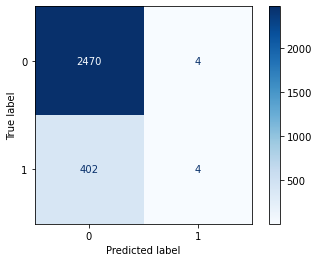

In [50]:
plot_confusion_matrix(rf_clf, X_val, y_val, cmap='Blues')

In [51]:
pd.DataFrame(precision_recall_fscore_support(y_val, y_preds), 
             index=['Precision', 'Recall', 'Fscore', 'Support'])

,0,1
Precision,0.860028,0.500000
Recall,0.998383,0.009852
Fscore,0.924055,0.019324
Support,2474.000000,406.000000


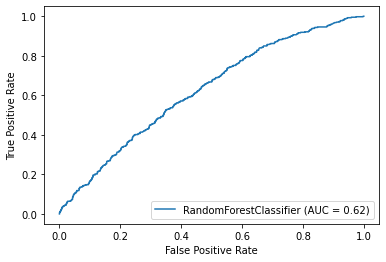

In [53]:
plot_roc_curve(rf_clf, X_val, y_val)